<a href="https://colab.research.google.com/github/ShubhDixit20/Sagemaker_test/blob/main/Model_development_notebook_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive

/content/drive/MyDrive


In [4]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [5]:
os.getcwd()

'/content/drive/MyDrive'

In [6]:
csv_path = os.path.join('T_out1.csv')
csv_path

'T_out1.csv'

In [7]:
data = pd.read_csv(csv_path)
data

deviceId   timestamp  AccX  AccY  AccZ
0           109  1691408812  1.56 -9.53 -1.56
1           109  1691408812  1.72 -9.22 -1.56
2           109  1691408812  1.72 -9.38 -1.09
3           109  1691408812  1.72 -9.38 -1.88
4           109  1691408812  1.41 -9.69 -1.88
...         ...         ...   ...   ...   ...
77115       109  1691476158  0.94  9.06 -0.94
77116       109  1691476158  1.41  9.06 -0.62
77117       109  1691476158  1.25  9.22 -0.94
77118       109  1691476158  1.25  9.53 -1.41
77119       109  1691476158  0.78  9.69 -0.94

[77120 rows x 5 columns]

In [8]:
copied_data = data.copy()
copied_data

deviceId   timestamp  AccX  AccY  AccZ
0           109  1691408812  1.56 -9.53 -1.56
1           109  1691408812  1.72 -9.22 -1.56
2           109  1691408812  1.72 -9.38 -1.09
3           109  1691408812  1.72 -9.38 -1.88
4           109  1691408812  1.41 -9.69 -1.88
...         ...         ...   ...   ...   ...
77115       109  1691476158  0.94  9.06 -0.94
77116       109  1691476158  1.41  9.06 -0.62
77117       109  1691476158  1.25  9.22 -0.94
77118       109  1691476158  1.25  9.53 -1.41
77119       109  1691476158  0.78  9.69 -0.94

[77120 rows x 5 columns]

In [9]:
data.dtypes

deviceId       int64
timestamp      int64
AccX         float64
AccY         float64
AccZ         float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77120 entries, 0 to 77119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deviceId   77120 non-null  int64  
 1   timestamp  77120 non-null  int64  
 2   AccX       77120 non-null  float64
 3   AccY       77120 non-null  float64
 4   AccZ       77120 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.9 MB


In [11]:
data.head()

deviceId   timestamp  AccX  AccY  AccZ
0       109  1691408812  1.56 -9.53 -1.56
1       109  1691408812  1.72 -9.22 -1.56
2       109  1691408812  1.72 -9.38 -1.09
3       109  1691408812  1.72 -9.38 -1.88
4       109  1691408812  1.41 -9.69 -1.88

In [12]:
data.describe()

deviceId     timestamp          AccX          AccY          AccZ
count   77120.0  7.712000e+04  77120.000000  77120.000000  77120.000000
mean      109.0  1.691443e+09      0.564512      7.481783     -2.031782
std         0.0  1.949027e+04      2.705590      4.609254      1.762000
min       109.0  1.691409e+09    -19.530000    -13.120000    -19.530000
25%       109.0  1.691427e+09     -0.470000      8.440000     -2.340000
50%       109.0  1.691443e+09      1.250000      9.060000     -1.720000
75%       109.0  1.691460e+09      2.500000      9.380000     -1.250000
max       109.0  1.691476e+09     19.530000     19.530000     19.530000

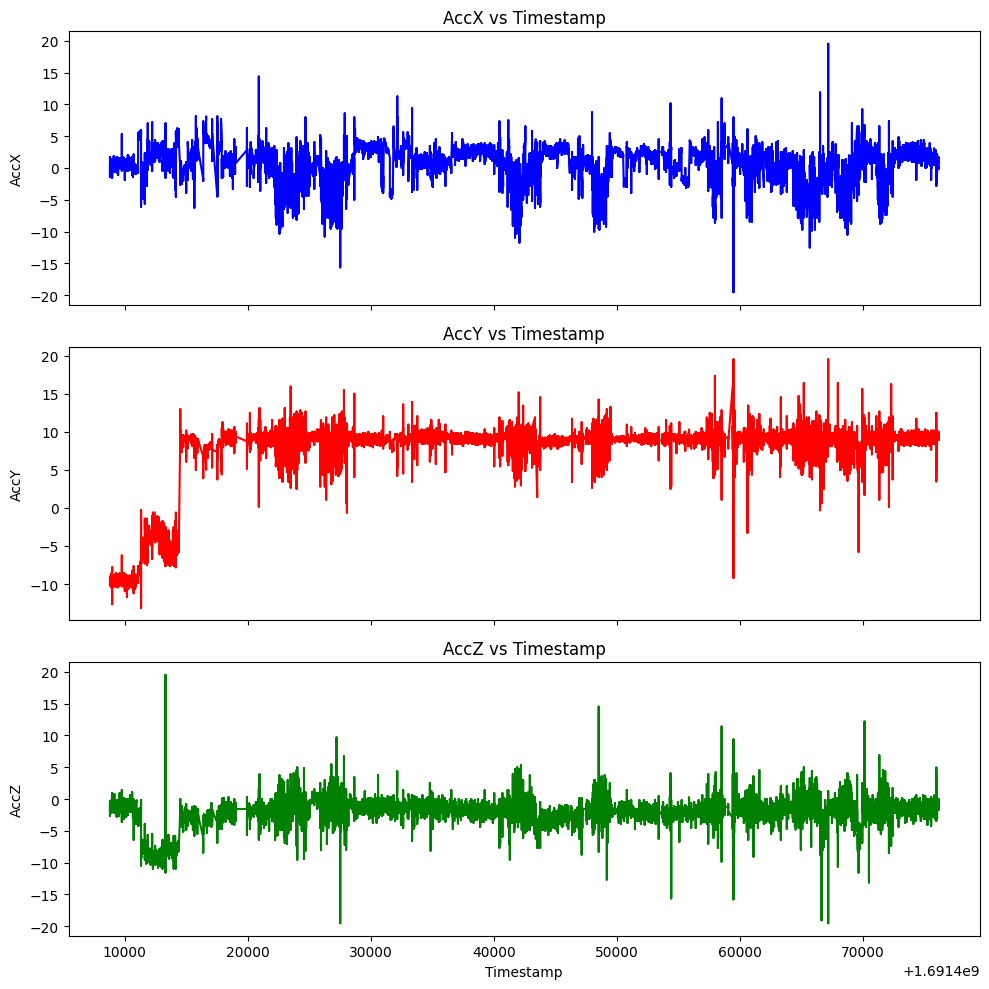

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10,10), sharex=True)

axs[0].plot(data['timestamp'], data['AccX'], color='blue')
axs[0].set_title('AccX vs Timestamp')
axs[0].set_ylabel('AccX')

axs[1].plot(data['timestamp'], data['AccY'], color='red')
axs[1].set_title('AccY vs Timestamp')
axs[1].set_ylabel('AccY')

axs[2].plot(data['timestamp'], data['AccZ'], color='green')
axs[2].set_title('AccZ vs Timestamp')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('AccZ')

fig.tight_layout()

plt.show()

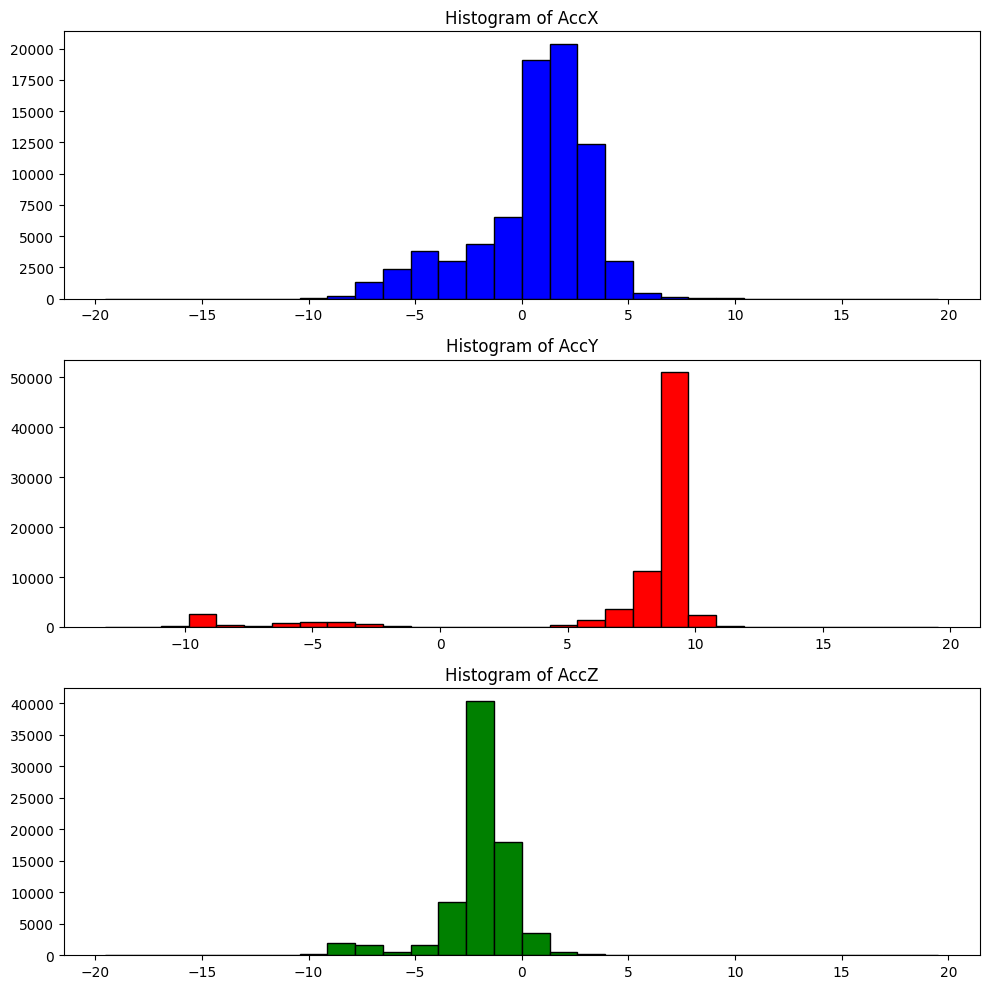

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))

axs[0].hist(data['AccX'], bins=30, color='blue', edgecolor='black')
axs[0].set_title('Histogram of AccX')

axs[1].hist(data['AccY'], bins=30, color='red', edgecolor='black')
axs[1].set_title('Histogram of AccY')

axs[2].hist(data['AccZ'], bins=30, color='green', edgecolor='black')
axs[2].set_title('Histogram of AccZ')

fig.tight_layout()

plt.show()


In [15]:
correlation = data[['AccX', 'AccY', 'AccZ']].corr()
correlation

AccX      AccY      AccZ
AccX  1.000000 -0.008664 -0.250252
AccY -0.008664  1.000000  0.437211
AccZ -0.250252  0.437211  1.000000

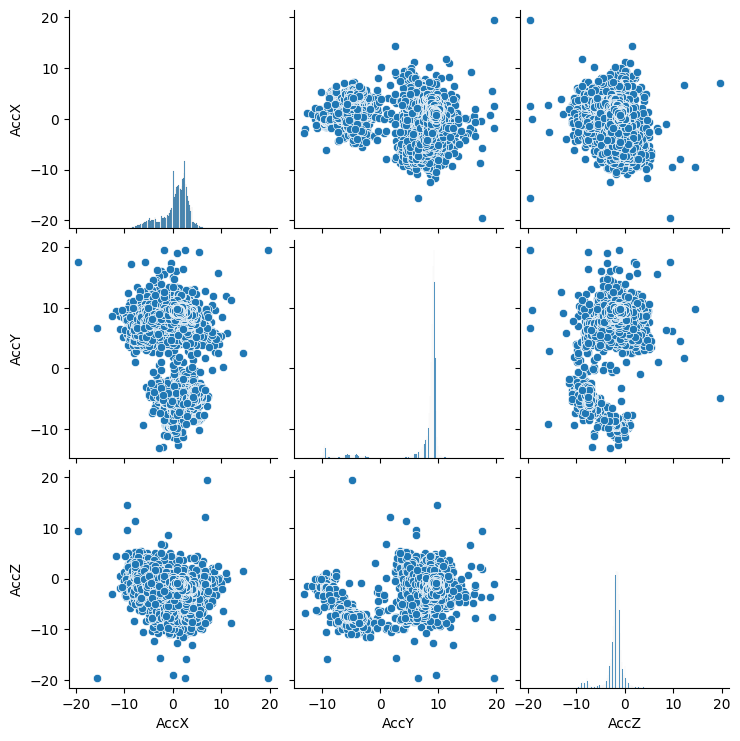

In [16]:
sns.pairplot(data[['AccX', 'AccY', 'AccZ']])
plt.show()

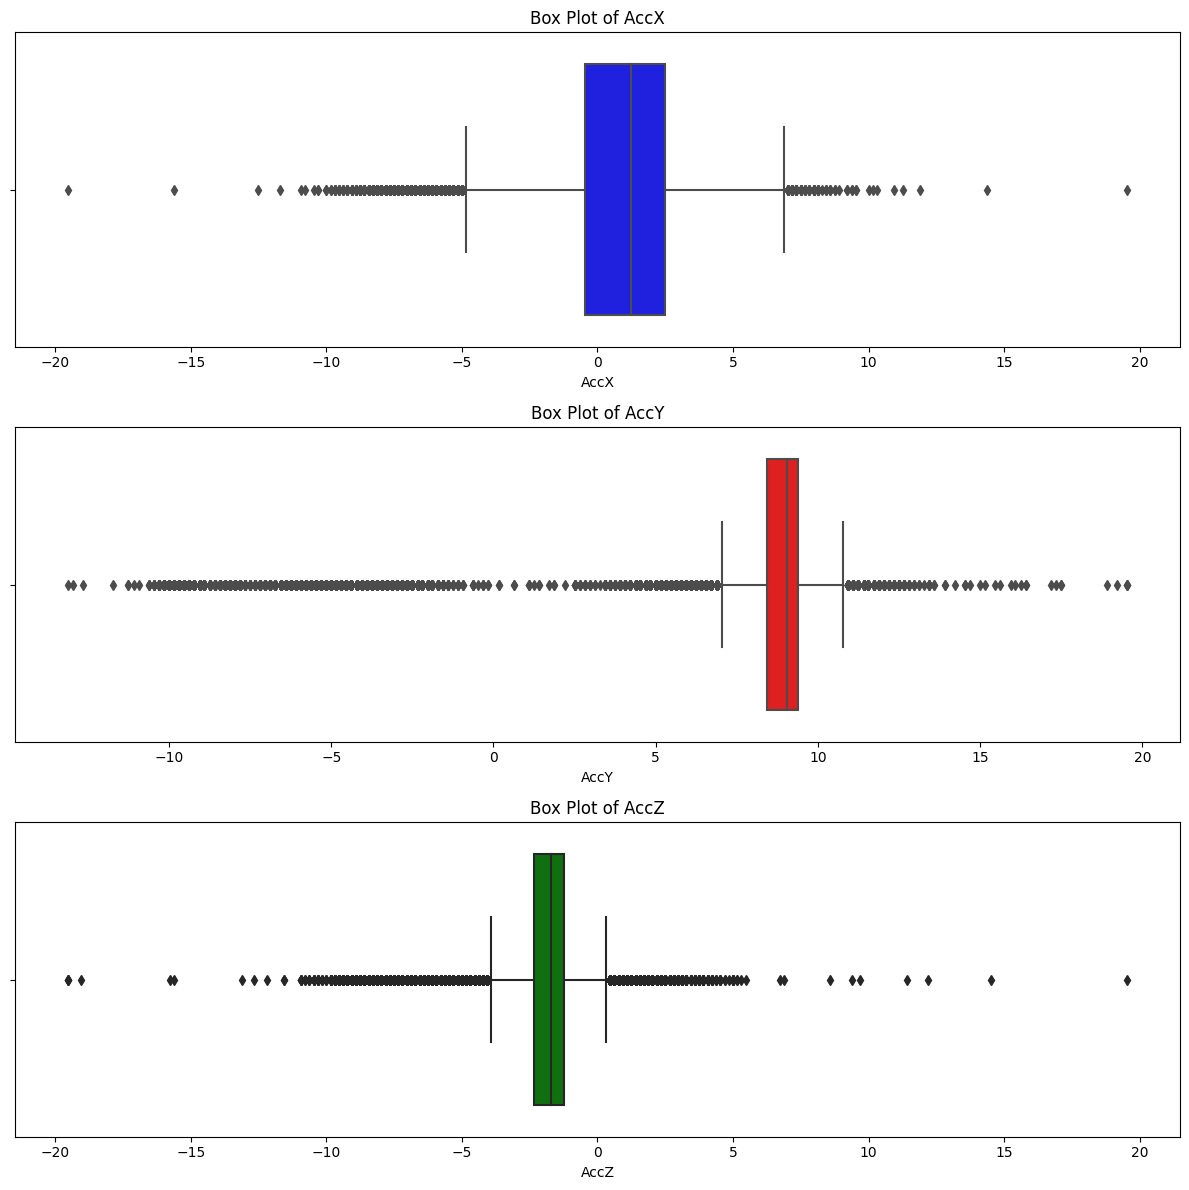

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

sns.boxplot(x=data['AccX'], ax=axs[0], color='blue')
axs[0].set_title('Box Plot of AccX')

sns.boxplot(x=data['AccY'], ax=axs[1], color='red')
axs[1].set_title('Box Plot of AccY')

sns.boxplot(x=data['AccZ'], ax=axs[2], color='green')
axs[2].set_title('Box Plot of AccZ')

fig.tight_layout()

plt.show()


In [18]:
# plt.plot(data['timestamp'], data['AccX'], marker='o', linestyle='-', color='b', label='X')
# plt.plot(data['timestamp'], data['AccY'], marker='o', linestyle='-', color='r', label='Y')
# plt.plot(data['timestamp'], data['AccZ'], marker='o', linestyle='-', color='g', label='Z')

# plt.legend()
# plt.show()

### Feature extraction

In [19]:
SAMPLING_RATE = 79
WINDOW_SIZE = 4
STEP_SIZE = 1

In [20]:
window_length = SAMPLING_RATE * WINDOW_SIZE
step_length = SAMPLING_RATE * STEP_SIZE

In [21]:
window_length, step_length

(316, 79)

In [22]:
data_selected = data[['AccX', 'AccY', 'AccZ']]
data_selected

AccX  AccY  AccZ
0      1.56 -9.53 -1.56
1      1.72 -9.22 -1.56
2      1.72 -9.38 -1.09
3      1.72 -9.38 -1.88
4      1.41 -9.69 -1.88
...     ...   ...   ...
77115  0.94  9.06 -0.94
77116  1.41  9.06 -0.62
77117  1.25  9.22 -0.94
77118  1.25  9.53 -1.41
77119  0.78  9.69 -0.94

[77120 rows x 3 columns]

In [23]:
from tqdm import tqdm

In [24]:
def feature_extraction(df,
                       step_length,
                       window_length):
    """_summary_

    Parameters
    ----------
    data_formatted : pd.DataFrame
        _description_
    step_length : int
        _description_
    window_length : int
        _description_
    features_list : list
        _description_

    Returns
    -------
    _type_
        _description_
    """

    features_df = pd.DataFrame()

    # data_formatted = remove_rows_containing_null_values(df)
    # data_formatted = df_nan_treated.drop(["TimeStamp_JST"], axis=1)

    # labels = data_selected['Label']
    range_end = len(df) - window_length

    features_list = ["Time Stamp",
                     # 'cow_identifier',
                    #  'label',
                     'AccX', 'AccY', 'AccZ',
                     'AccX_kurt', 'AccY_kurt', 'AccZ_kurt',
                     'AccX_mean', 'AccY_mean', 'AccZ_mean',
                     'AccX_median', 'AccY_median', 'AccZ_median',
                     'AccX_min', 'AccY_min', 'AccZ_min',
                     'AccX_max', 'AccY_max', 'AccZ_max',
                     'AccX_quan_25', 'AccY_quan_25', 'AccZ_quan_25',
                     'AccX_quan_50', 'AccY_quan_50', 'AccZ_quan_50',
                     'AccX_quan_75', 'AccY_quan_75', 'AccZ_quan_75',
                     'AccX_skew', 'AccY_skew', 'AccZ_skew',
                     'AccX_sum', 'AccY_sum', 'AccZ_sum',
                     'AccX_std', 'AccY_std', 'AccZ_std',
                     'AccX_var', 'AccY_var', 'AccZ_var',
                     'SignalMagnitudeArea',
                     'VectorMagnitude',
                     'MovementVariation',
                     'Energy',
                     'Entropy']


    for i in tqdm(range(0, range_end, step_length)):

        timestamp_list = df[['timestamp']][i: i + window_length]
        timestamp_max = timestamp_list.max()

        data_feature = data_selected[['AccX', 'AccY', 'AccZ']][i: i + window_length]

        # features
        data_kurt = data_feature.kurtosis()

        data_mean = data_feature.mean()

        data_median = data_feature.median()

        data_min = data_feature.min()

        data_max = data_feature.max()

        data_quan_25 = data_feature.quantile(q=0.25)

        data_quan_50 = data_feature.quantile(q=0.5)
        # print("data_50:",data_quan_50)

        data_quan_75 = data_feature.quantile(q=0.75)
        # print("data_75:",data_quan_75)

        data_skew = data_feature.skew()
        # print("data_skew: ",data_skew)

        data_sum = data_feature.sum()
        # print("data_sum:",data_sum)

        data_std = data_feature.std()
        # print("data_std:",data_std)

        data_var = data_feature.var()
        # print("data_var:",data_var)

        SignalMagnitudeArea = abs(data_selected.loc[i][0]) + abs(data_selected.loc[i][1]) + abs(data_selected.loc[i][2])

        VectorMagnitude = np.sqrt(abs(data_selected.loc[i][0] + data_selected.loc[i][1] + data_selected.loc[i][2]))

        MovementVariation = abs(data_selected.loc[i+1][0]-data_selected.loc[i][0]) + abs(data_selected.loc[i+1][1]-data_selected.loc[i][1]) + abs(data_selected.loc[i+1][2]-data_selected.loc[i][2])

        Energy = ((data_selected.loc[i][0])**2 + (data_selected.loc[i][1])**2 + (data_selected.loc[i][2])**2)**2

        Entropy = (1+(data_selected.loc[i][0] + data_selected.loc[i][1] + data_selected.loc[i][2]))**2 * np.log(abs(1+data_selected.loc[i][0] + data_selected.loc[i][1] + (data_selected.loc[i][2])**2))

        data_combined_hor = pd.concat([pd.Series(timestamp_max[0]),
                                    #    pd.Series(labels.loc[i]),

                                       pd.Series(data_feature.loc[i][0]),
                                       pd.Series(data_feature.loc[i][1]),
                                       pd.Series(data_feature.loc[i][2]),

                                       pd.Series(data_kurt[0]),
                                       pd.Series(data_kurt[1]),
                                       pd.Series(data_kurt[2]),

                                       pd.Series(data_mean[0]),
                                       pd.Series(data_mean[1]),
                                       pd.Series(data_mean[2]),

                                       pd.Series(data_median[0]),
                                       pd.Series(data_median[1]),
                                       pd.Series(data_median[2]),

                                       pd.Series(data_min[0]),
                                       pd.Series(data_min[1]),
                                       pd.Series(data_min[2]),

                                       pd.Series(data_max[0]),
                                       pd.Series(data_max[1]),
                                       pd.Series(data_max[2]),

                                       pd.Series(data_quan_25[0]),
                                       pd.Series(data_quan_25[1]),
                                       pd.Series(data_quan_25[2]),

                                       pd.Series(data_quan_50[0]),
                                       pd.Series(data_quan_50[1]),
                                       pd.Series(data_quan_50[2]),

                                       pd.Series(data_quan_75[0]),
                                       pd.Series(data_quan_75[1]),
                                       pd.Series(data_quan_75[2]),

                                       pd.Series(data_skew[0]),
                                       pd.Series(data_skew[1]),
                                       pd.Series(data_skew[2]),

                                       pd.Series(data_sum[0]),
                                       pd.Series(data_sum[1]),
                                       pd.Series(data_sum[2]),

                                       pd.Series(data_std[0]),
                                       pd.Series(data_std[1]),
                                       pd.Series(data_std[2]),

                                       pd.DataFrame(data_var[0:]).transpose(),

                                       pd.Series(SignalMagnitudeArea),
                                       pd.Series(VectorMagnitude),
                                       pd.Series(MovementVariation),
                                       pd.Series(Energy),
                                       pd.Series(Entropy)],

                                      axis=1,
                                      ignore_index=True)

        features_df = pd.concat([features_df,
                                data_combined_hor], ignore_index=True,
                                axis=0)


    features_df.columns = features_list

    features_df.dropna()

    # Saving Dataframe
    features_df.to_csv("cleaned_train_dataframe.csv", index=False)

    return features_df


In [25]:
features = feature_extraction(data,
                              step_length=step_length,
                              window_length = window_length)

100%|██████████| 973/973 [00:33<00:00, 29.36it/s]


In [26]:
features

Time Stamp  AccX   AccY  AccZ  AccX_kurt  AccY_kurt  AccZ_kurt  \
0    1691408993  1.56  -9.53 -1.56   0.369773  21.096188   0.570473   
1    1691409053  0.62 -10.16 -1.09   0.695596  21.320785   2.537606   
2    1691409113  0.62  -9.84 -1.25   0.859470  19.535112   3.699987   
3    1691409173  0.00  -9.53 -1.25   0.917598  20.412255   4.893429   
4    1691409233  0.00  -9.53  0.94   0.171934   0.188021   6.436319   
..          ...   ...    ...   ...        ...        ...        ...   
968  1691475857  1.56   8.59 -2.03  -0.178892   0.163204   3.825388   
969  1691475917  1.88   9.84 -1.56  -0.318623   0.046209   4.090297   
970  1691475977  2.19   9.22 -2.03   1.227446   1.685921   3.542384   
971  1691476037  1.88   9.38 -0.62   1.654749  70.118348  24.551817   
972  1691476158  1.56   9.38 -1.41   2.341348  80.263228  20.121827   

     AccX_mean  AccY_mean  AccZ_mean  ...  AccY_std  AccZ_std  AccX_var  \
0     0.319525  -9.585791  -1.305000  ...  0.352002  0.382951  0.328320   
1     0.317627  -9.596772  -1.249620  ...  0.350179  0.397828  0.238878   
2     0.500000  -9.604082  -1.224747  ...  0.356546  0.397654  0.249321   
3     0.570601  -9.600538  -1.202405  ...  0.352207  0.402285  0.217274   
4     0.659937  -9.583133  -1.241551  ...  0.268228  0.385599  0.154882   
..         ...        ...        ...  ...       ...       ...       ...   
968   1.699620   9.290728  -1.573924  ...  0.325305  0.415836  0.224354   
969   1.688070   9.285316  -1.535475  ...  0.324121  0.397416  0.241864   
970   1.366266   9.276361  -1.584399  ...  0.323514  0.451217  0.678226   
971   1.000475   9.306044  -1.481266  ...  0.490026  0.688649  0.893669   
972   0.789905   9.347152  -1.357627  ...  0.476760  0.707962  0.716692   

     AccY_var  AccZ_var  SignalMagnitudeArea  VectorMagnitude  \
0    0.123906  0.146652                12.65         3.087070   
1    0.122625  0.158267                11.87         3.260368   
2    0.127125  0.158129                11.71         3.235738   
3    0.124050  0.161833                10.78         3.283291   
4    0.071946  0.148687                10.47         2.930870   
..        ...       ...                  ...              ...   
968  0.105823  0.172920                12.18         2.849561   
969  0.105054  0.157939                13.28         3.187475   
970  0.104661  0.203597                13.44         3.062679   
971  0.240126  0.474237                11.88         3.261901   
972  0.227300  0.501211                12.35         3.087070   

     MovementVariation        Energy     Entropy  
0                 0.47   9156.212482  110.024212  
1                 1.09  10982.641764  185.006293  
2                 1.24   9756.006756  170.012032  
3                 0.93   8534.692596  185.678076  
4                 2.51   8409.715320  117.188410  
..                 ...           ...         ...  
968               1.87   6454.933375  226.729177  
969               1.09  10566.524201  338.544599  
970               0.63   8821.980765  302.247969  
971               2.02   8446.198170  343.766168  
972               0.15   8538.887317  292.050132  

[973 rows x 45 columns]

### Misc

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [28]:
X = features.iloc[:, 4:45]
X

AccX_kurt  AccY_kurt  AccZ_kurt  AccX_mean  AccY_mean  AccZ_mean  \
0     0.369773  21.096188   0.570473   0.319525  -9.585791  -1.305000   
1     0.695596  21.320785   2.537606   0.317627  -9.596772  -1.249620   
2     0.859470  19.535112   3.699987   0.500000  -9.604082  -1.224747   
3     0.917598  20.412255   4.893429   0.570601  -9.600538  -1.202405   
4     0.171934   0.188021   6.436319   0.659937  -9.583133  -1.241551   
..         ...        ...        ...        ...        ...        ...   
968  -0.178892   0.163204   3.825388   1.699620   9.290728  -1.573924   
969  -0.318623   0.046209   4.090297   1.688070   9.285316  -1.535475   
970   1.227446   1.685921   3.542384   1.366266   9.276361  -1.584399   
971   1.654749  70.118348  24.551817   1.000475   9.306044  -1.481266   
972   2.341348  80.263228  20.121827   0.789905   9.347152  -1.357627   

     AccX_median  AccY_median  AccZ_median  AccX_min  ...  AccY_std  AccZ_std  \
0           0.31        -9.53        -1.25     -1.56  ...  0.352002  0.382951   
1           0.31        -9.53        -1.25     -1.56  ...  0.350179  0.397828   
2           0.47        -9.53        -1.25     -1.56  ...  0.356546  0.397654   
3           0.62        -9.53        -1.25     -1.56  ...  0.352207  0.402285   
4           0.62        -9.53        -1.25     -0.62  ...  0.268228  0.385599   
..           ...          ...          ...       ...  ...       ...       ...   
968         1.72         9.38        -1.56      0.47  ...  0.325305  0.415836   
969         1.72         9.38        -1.56      0.47  ...  0.324121  0.397416   
970         1.56         9.38        -1.56     -2.19  ...  0.323514  0.451217   
971         1.25         9.38        -1.56     -2.81  ...  0.490026  0.688649   
972         0.94         9.38        -1.41     -2.81  ...  0.476760  0.707962   

     AccX_var  AccY_var  AccZ_var  SignalMagnitudeArea  VectorMagnitude  \
0    0.328320  0.123906  0.146652                12.65         3.087070   
1    0.238878  0.122625  0.158267                11.87         3.260368   
2    0.249321  0.127125  0.158129                11.71         3.235738   
3    0.217274  0.124050  0.161833                10.78         3.283291   
4    0.154882  0.071946  0.148687                10.47         2.930870   
..        ...       ...       ...                  ...              ...   
968  0.224354  0.105823  0.172920                12.18         2.849561   
969  0.241864  0.105054  0.157939                13.28         3.187475   
970  0.678226  0.104661  0.203597                13.44         3.062679   
971  0.893669  0.240126  0.474237                11.88         3.261901   
972  0.716692  0.227300  0.501211                12.35         3.087070   

     MovementVariation        Energy     Entropy  
0                 0.47   9156.212482  110.024212  
1                 1.09  10982.641764  185.006293  
2                 1.24   9756.006756  170.012032  
3                 0.93   8534.692596  185.678076  
4                 2.51   8409.715320  117.188410  
..                 ...           ...         ...  
968               1.87   6454.933375  226.729177  
969               1.09  10566.524201  338.544599  
970               0.63   8821.980765  302.247969  
971               2.02   8446.198170  343.766168  
972               0.15   8538.887317  292.050132  

[973 rows x 41 columns]

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [31]:
feature_loads = pca.components_

In [32]:
score = np.sum(np.square(feature_loads), axis = 0)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [33]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [34]:
pca.fit(X_scaled)

PCA(n_components=10)

In [35]:
df_reduced = pca.fit_transform(X_scaled)
df_reduced

array([[ 4.86112389e+00,  4.91157125e+00, -7.61190282e+00, ...,
         1.07495439e-01,  3.54786916e-01,  2.20907954e-03],
       [ 4.87242603e+00,  4.83168503e+00, -7.72843336e+00, ...,
        -1.41719379e-01,  3.23703288e-01, -7.10532720e-02],
       [ 4.92397419e+00,  4.72980101e+00, -7.70377294e+00, ...,
        -2.86852127e-01,  3.00517056e-01, -1.71799959e-01],
       ...,
       [ 2.55499063e-01, -2.20518140e+00, -3.66666933e-01, ...,
        -3.37549393e-01,  6.87141090e-02, -2.35938184e-01],
       [-5.30769408e-01, -1.59953712e+00,  2.36540298e-01, ...,
        -3.26709822e+00,  1.00809956e+00,  5.65399857e-01],
       [-7.52175549e-01, -1.69345207e+00,  7.09905000e-02, ...,
        -3.24919065e+00,  1.28859253e+00,  8.53364150e-01]])

In [36]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.29917355, 0.22982997, 0.10261594, 0.05950239, 0.0478472 ,
       0.0422305 , 0.03519899, 0.03080896, 0.02683319, 0.02463008])

In [37]:
# plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=cluster_labels, cmap='rainbow')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('PCA Visualization')
# plt.show()

In [38]:
# imputer = SimpleImputer(strategy='mean')
# df_imputed = imputer.fit_transform(df)

# pca = PCA(n_components=2)
# df_reduced_imputed = pca.fit_transform(df_imputed)

### Group features extraction

In [39]:
def convert_to_milliseconds(ts):
    return ts * 1000

In [40]:
UNIX_timestamp_ms = []

In [41]:
def s_ms(stamp_df):
    UNIX_timestamp_ms.clear()
    last_milliseconds = convert_to_milliseconds(int(stamp_df.iloc[-1]))
    UNIX_timestamp_ms.append(last_milliseconds)

    for i in range(len(stamp_df) - 2, -1, -1):
        timestamp = stamp_df[i]

        last_milliseconds -= 500
        UNIX_timestamp_ms.append(last_milliseconds)

    UNIX_timestamp_ms.reverse()
    return UNIX_timestamp_ms

In [42]:
d1 = copied_data[:35000]

In [43]:
d1

deviceId   timestamp  AccX  AccY  AccZ
0           109  1691408812  1.56 -9.53 -1.56
1           109  1691408812  1.72 -9.22 -1.56
2           109  1691408812  1.72 -9.38 -1.09
3           109  1691408812  1.72 -9.38 -1.88
4           109  1691408812  1.41 -9.69 -1.88
...         ...         ...   ...   ...   ...
34995       109  1691439746  3.59  8.91 -1.72
34996       109  1691439746  3.12  9.06 -1.56
34997       109  1691439746  3.28  8.75 -2.03
34998       109  1691439746  3.28  9.06 -2.03
34999       109  1691439746  2.34  8.91 -1.56

[35000 rows x 5 columns]

In [44]:
d1['timestamp'] = s_ms(d1['timestamp'])

<ipython-input-44-911e3bb7c9b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['timestamp'] = s_ms(d1['timestamp'])


In [45]:
d1

deviceId      timestamp  AccX  AccY  AccZ
0           109  1691422246500  1.56 -9.53 -1.56
1           109  1691422247000  1.72 -9.22 -1.56
2           109  1691422247500  1.72 -9.38 -1.09
3           109  1691422248000  1.72 -9.38 -1.88
4           109  1691422248500  1.41 -9.69 -1.88
...         ...            ...   ...   ...   ...
34995       109  1691439744000  3.59  8.91 -1.72
34996       109  1691439744500  3.12  9.06 -1.56
34997       109  1691439745000  3.28  8.75 -2.03
34998       109  1691439745500  3.28  9.06 -2.03
34999       109  1691439746000  2.34  8.91 -1.56

[35000 rows x 5 columns]

In [46]:
feature1 = feature_extraction(d1,
                              step_length,
                              window_length)

100%|██████████| 440/440 [00:14<00:00, 30.73it/s]


In [47]:
feature1.to_csv('feature1.csv')

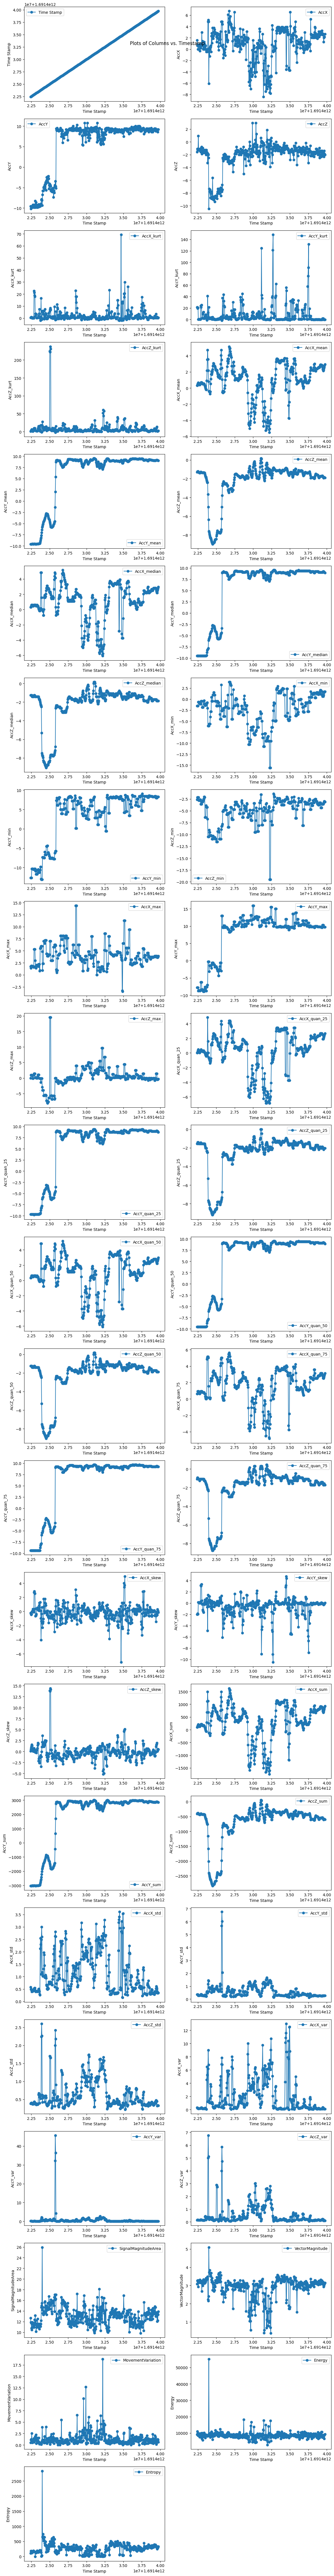

In [48]:
data = pd.read_csv('feature1.csv')

timestamp = data['Time Stamp']
column_names = data.columns[1:]

num_columns = len(column_names)
num_rows = (num_columns - 1) // 2 + 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.suptitle('Plots of Columns vs. Timestamp')

for idx, column_name in enumerate(column_names):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    ax.plot(timestamp, data[column_name], marker='o', linestyle='-', label=column_name)
    ax.set_xlabel('Time Stamp')
    ax.set_ylabel(column_name)
    ax.legend()

if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()

In [49]:
Group1 = feature1.iloc[:, 0:45]
temp_group = pd.DataFrame(Group1)
temp_group

Time Stamp  AccX   AccY  AccZ  AccX_kurt  AccY_kurt  AccZ_kurt  \
0    1691422404000  1.56  -9.53 -1.56   0.369773  21.096188   0.570473   
1    1691422443500  0.62 -10.16 -1.09   0.695596  21.320785   2.537606   
2    1691422483000  0.62  -9.84 -1.25   0.859470  19.535112   3.699987   
3    1691422522500  0.00  -9.53 -1.25   0.917598  20.412255   4.893429   
4    1691422562000  0.00  -9.53  0.94   0.171934   0.188021   6.436319   
..             ...   ...    ...   ...        ...        ...        ...   
435  1691439586500  1.25   9.06 -1.72   0.828269  -0.041249   1.737068   
436  1691439626000  2.03   9.22 -2.34   0.108408  -0.235645   1.324605   
437  1691439665500  2.19   8.59 -1.41   0.066434  -0.386495   1.436205   
438  1691439705000  2.19   9.22 -1.88   0.210421  -0.538125   1.885378   
439  1691439744500  2.66   9.22 -2.03   0.462962  -0.306617   2.761384   

     AccX_mean  AccY_mean  AccZ_mean  ...  AccY_std  AccZ_std  AccX_var  \
0     0.319525  -9.585791  -1.305000  ...  0.352002  0.382951  0.328320   
1     0.317627  -9.596772  -1.249620  ...  0.350179  0.397828  0.238878   
2     0.500000  -9.604082  -1.224747  ...  0.356546  0.397654  0.249321   
3     0.570601  -9.600538  -1.202405  ...  0.352207  0.402285  0.217274   
4     0.659937  -9.583133  -1.241551  ...  0.268228  0.385599  0.154882   
..         ...        ...        ...  ...       ...       ...       ...   
435   2.225949   9.141297  -1.915981  ...  0.253607  0.320728  0.163374   
436   2.462152   9.096044  -1.871867  ...  0.271488  0.327025  0.111039   
437   2.589494   9.072753  -1.850190  ...  0.277458  0.325422  0.122940   
438   2.786804   9.017722  -1.868861  ...  0.281792  0.329321  0.115513   
439   2.937880   8.978070  -1.901392  ...  0.267671  0.325531  0.117494   

     AccY_var  AccZ_var  SignalMagnitudeArea  VectorMagnitude  \
0    0.123906  0.146652                12.65         3.087070   
1    0.122625  0.158267                11.87         3.260368   
2    0.127125  0.158129                11.71         3.235738   
3    0.124050  0.161833                10.78         3.283291   
4    0.071946  0.148687                10.47         2.930870   
..        ...       ...                  ...              ...   
435  0.064317  0.102867                12.03         2.930870   
436  0.073706  0.106945                13.59         2.984962   
437  0.076983  0.105900                12.19         3.061046   
438  0.079407  0.108452                13.29         3.087070   
439  0.071648  0.105970                13.91         3.138471   

     MovementVariation        Energy     Entropy  
0                 0.47   9156.212482  110.024212  
1                 1.09  10982.641764  185.006293  
2                 1.24   9756.006756  170.012032  
3                 0.93   8534.692596  185.678076  
4                 2.51   8409.715320  117.188410  
..                 ...           ...         ...  
435               0.63   7500.339420  244.455560  
436               0.78   8950.087104  282.349262  
437               1.25   6491.895527  281.999855  
438               1.09   8712.150253  307.041151  
439               0.63   9255.382784  333.539190  

[440 rows x 45 columns]

## Plots for feature extraction of group 1

In [50]:
import plotly.express as px

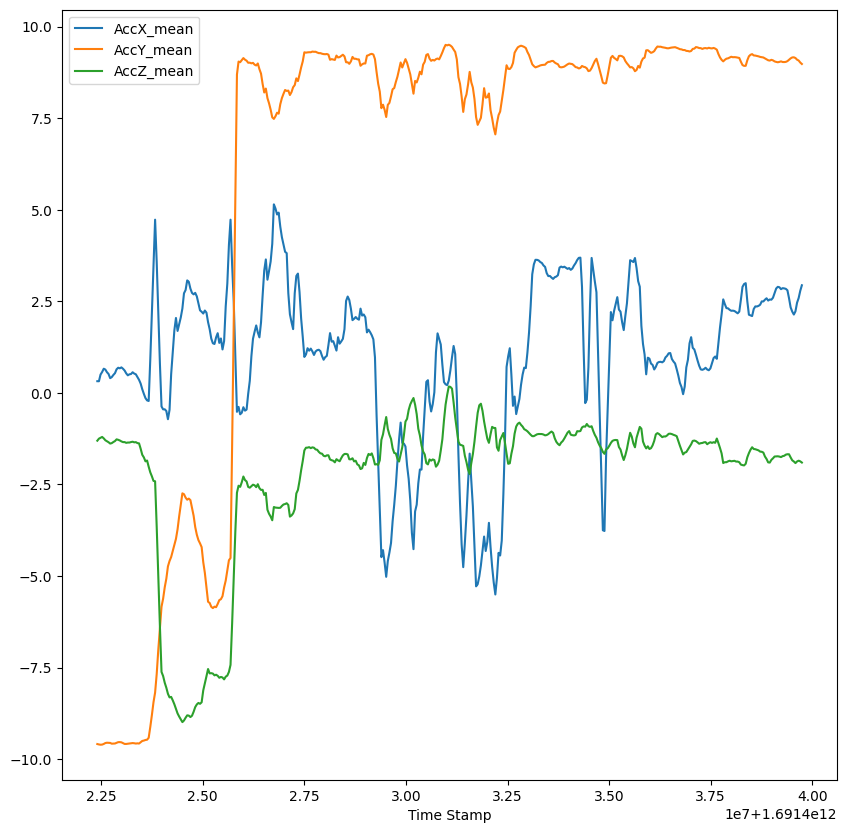

In [51]:
temp_group.plot(x="Time Stamp", y=['AccX_mean', 'AccY_mean', 'AccZ_mean'], kind="line", figsize=(10,10))
plt.show()

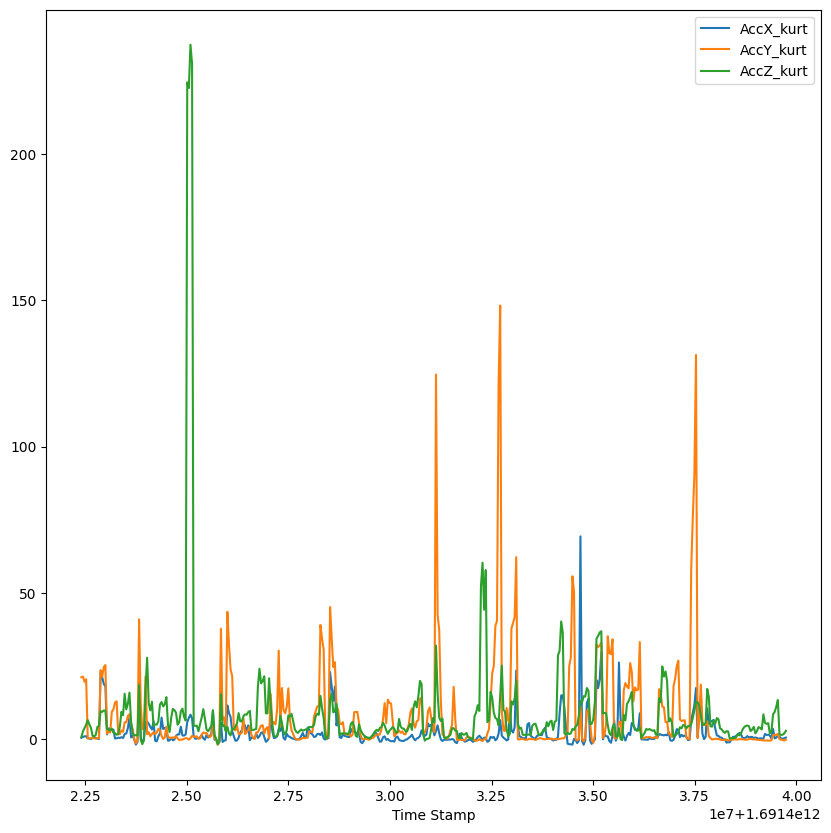

In [52]:
temp_group.plot(x="Time Stamp", y=['AccX_kurt', 'AccY_kurt', 'AccZ_kurt'], kind="line", figsize=(10,10))
plt.show()

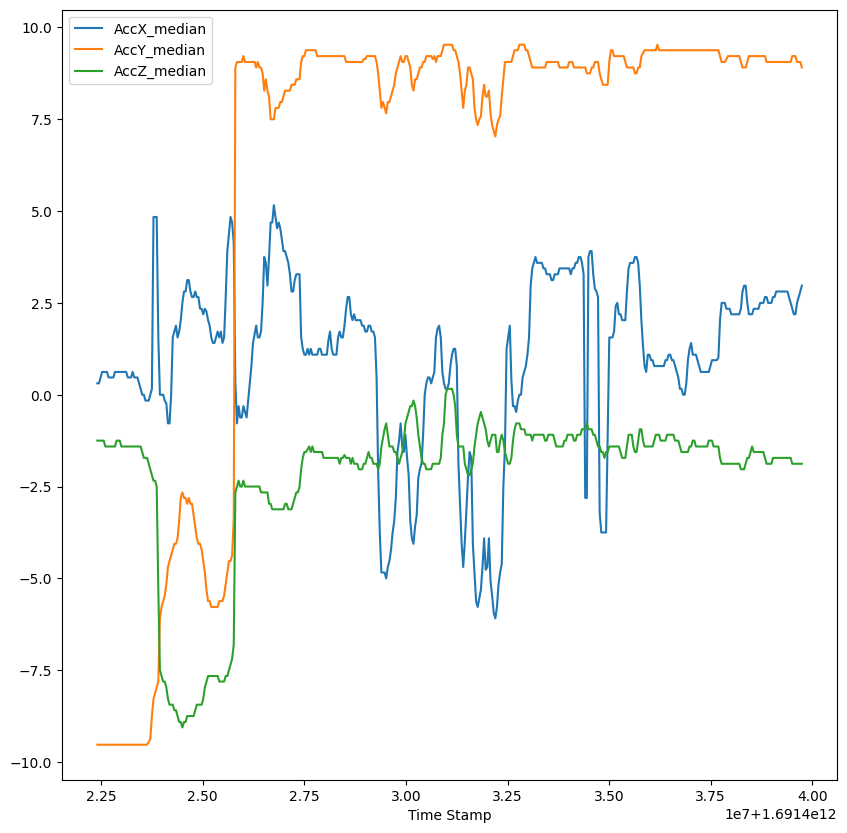

In [53]:
temp_group.plot(x="Time Stamp", y=['AccX_median', 'AccY_median', 'AccZ_median'], kind="line", figsize=(10,10))
plt.show()

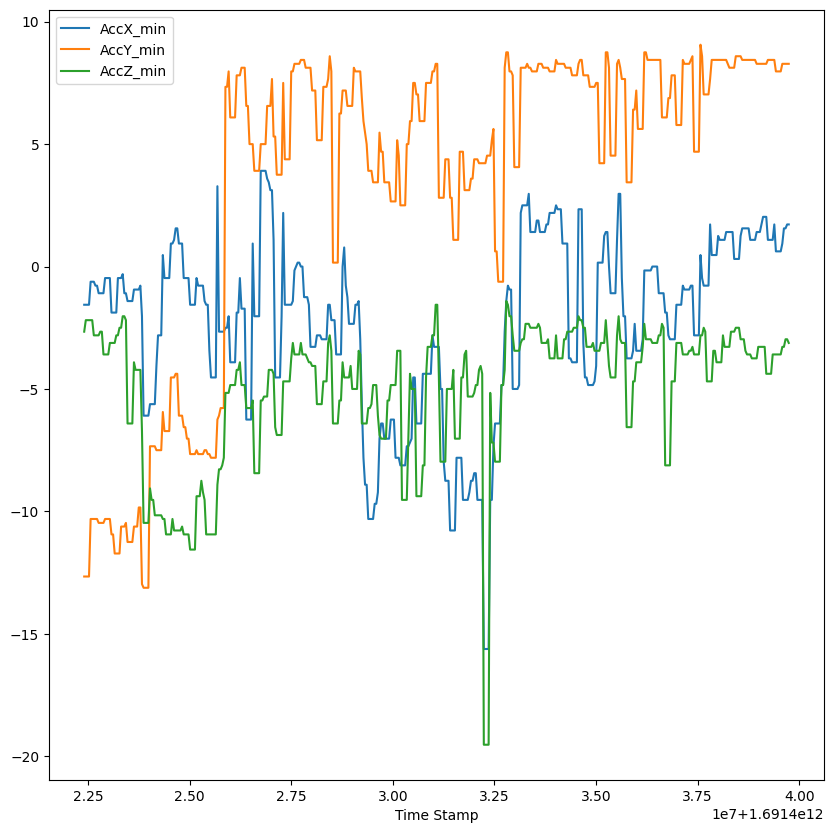

In [54]:
temp_group.plot(x="Time Stamp", y=['AccX_min', 'AccY_min', 'AccZ_min'], kind="line", figsize=(10,10))
plt.show()

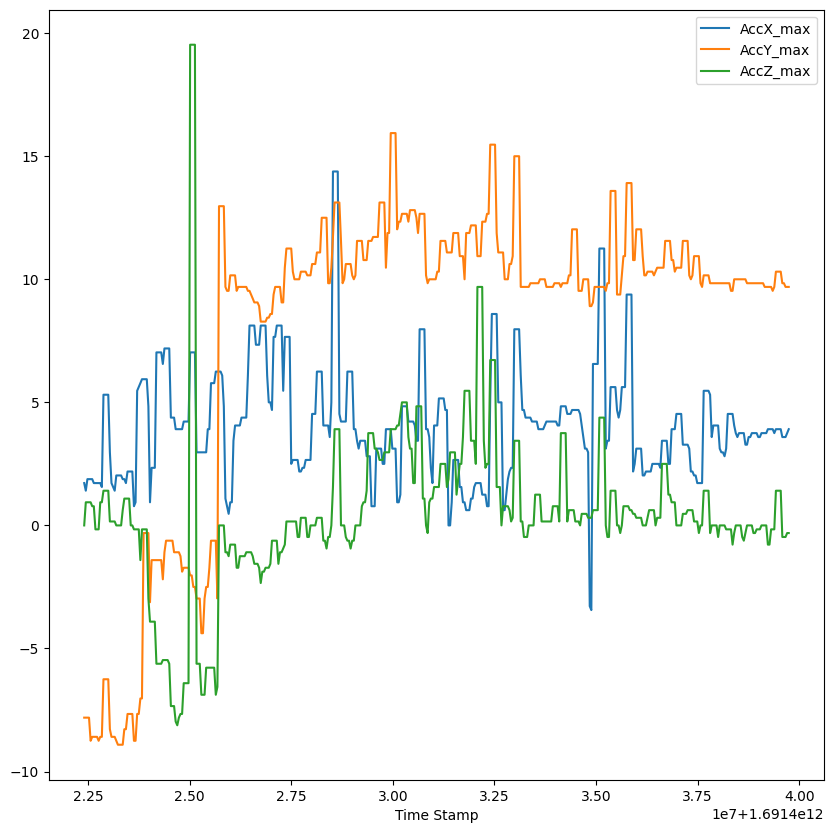

In [55]:
temp_group.plot(x="Time Stamp", y=['AccX_max', 'AccY_max', 'AccZ_max'], kind="line", figsize=(10,10))
plt.show()

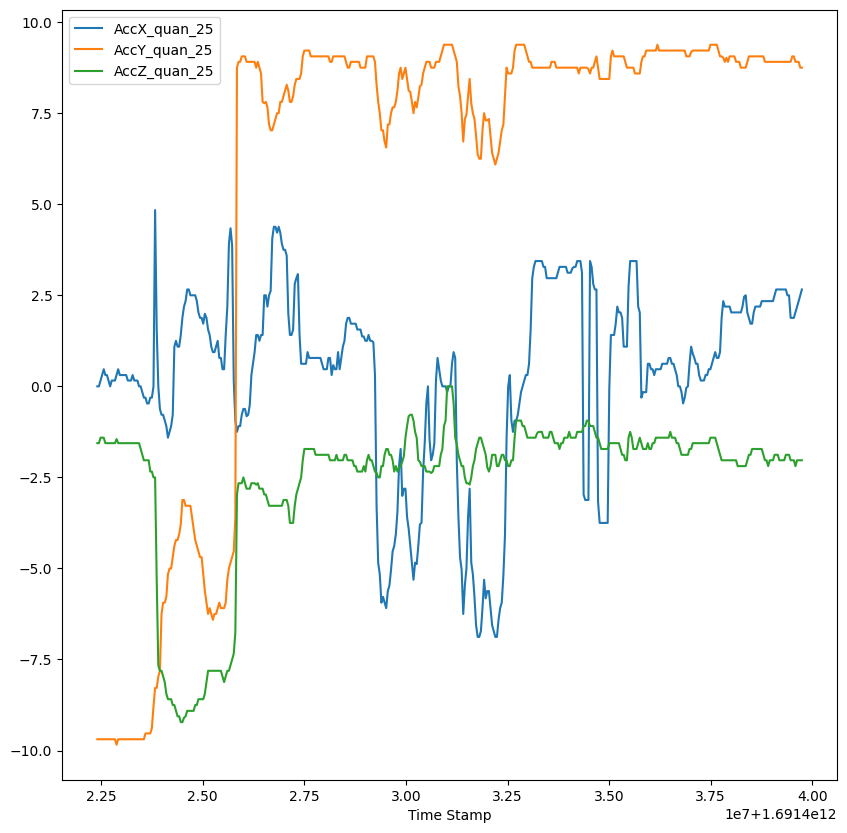

In [56]:
temp_group.plot(x="Time Stamp", y=['AccX_quan_25', 'AccY_quan_25', 'AccZ_quan_25'], kind="line", figsize=(10,10))
plt.show()

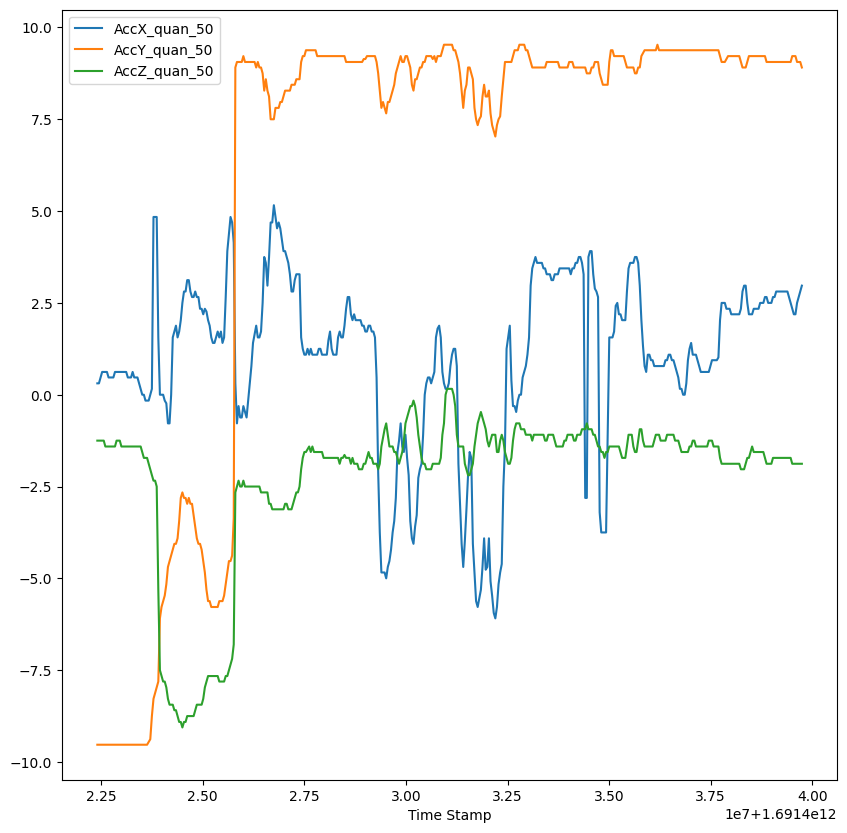

In [57]:
temp_group.plot(x="Time Stamp", y=['AccX_quan_50', 'AccY_quan_50', 'AccZ_quan_50'], kind="line", figsize=(10,10))
plt.show()

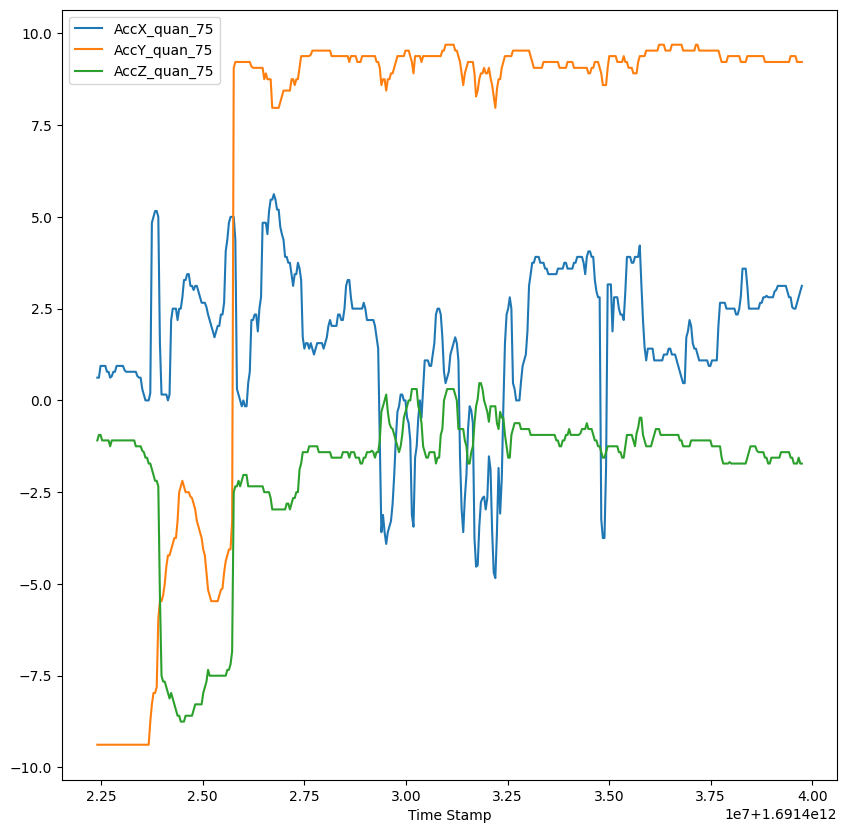

In [58]:
temp_group.plot(x="Time Stamp", y=['AccX_quan_75', 'AccY_quan_75', 'AccZ_quan_75'], kind="line", figsize=(10,10))
plt.show()

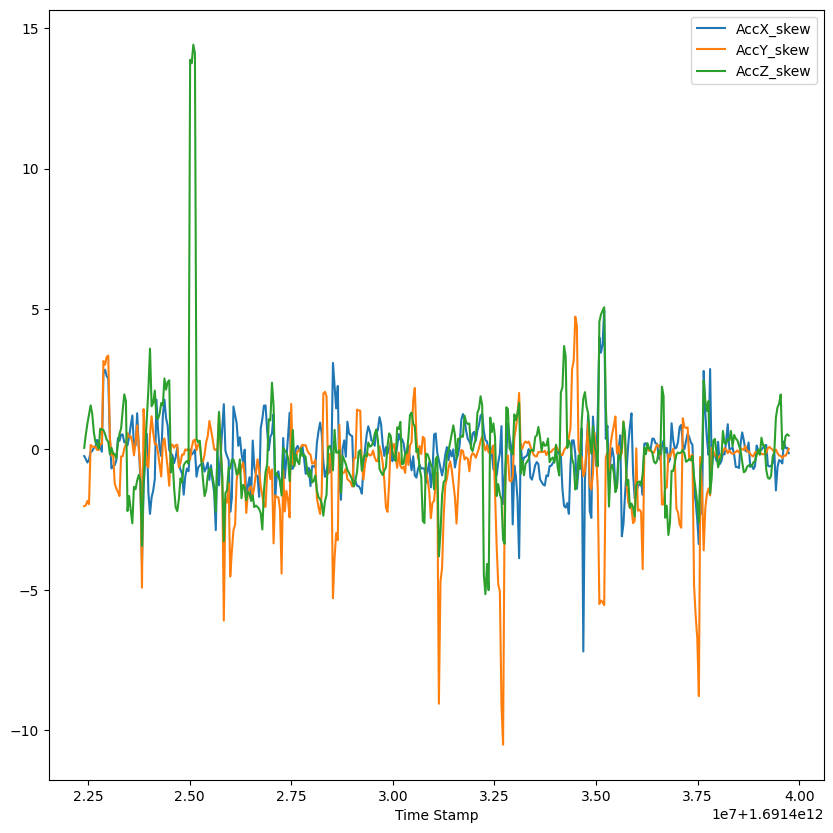

In [59]:
temp_group.plot(x="Time Stamp", y=['AccX_skew', 'AccY_skew', 'AccZ_skew'], kind="line", figsize=(10,10))
plt.show()

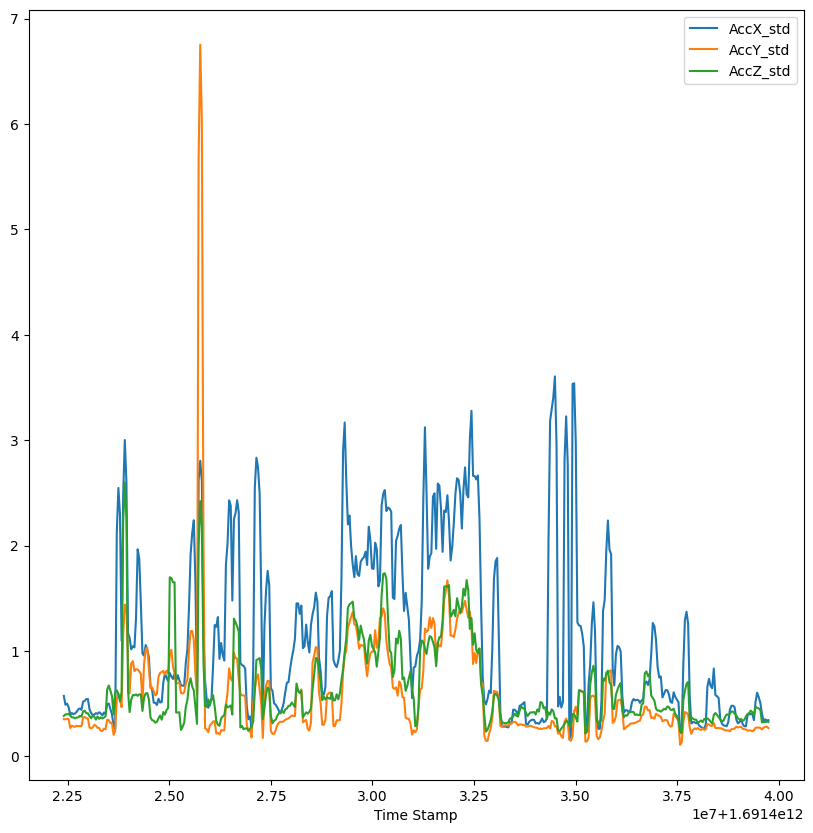

In [60]:
temp_group.plot(x="Time Stamp", y=['AccX_std', 'AccY_std', 'AccZ_std'], kind="line", figsize=(10,10))
plt.show()

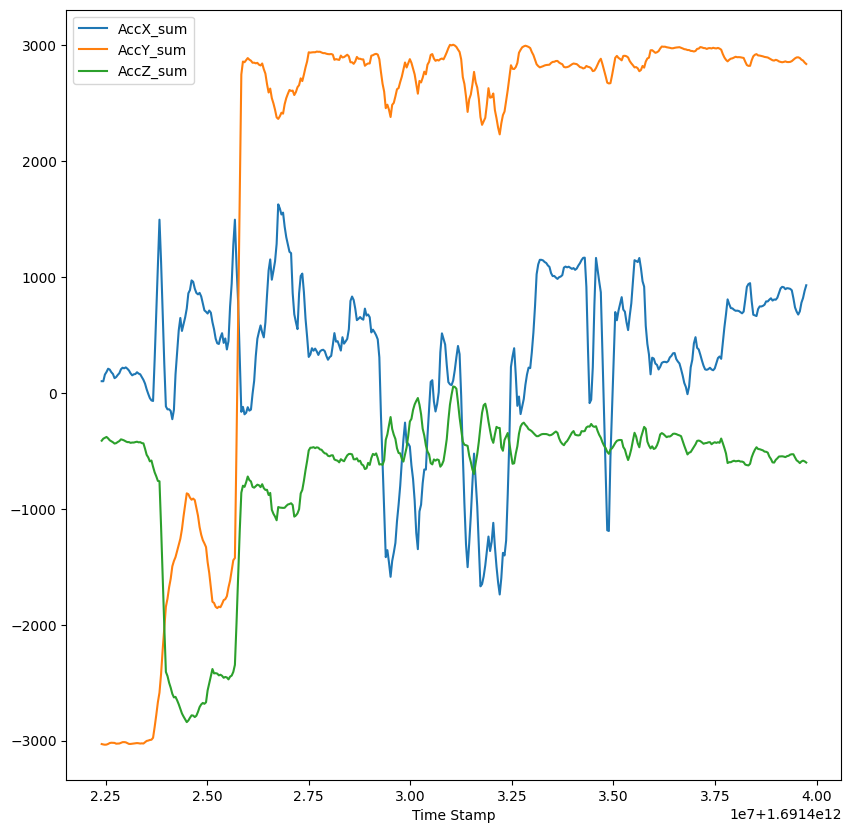

In [61]:
temp_group.plot(x="Time Stamp", y=['AccX_sum', 'AccY_sum', 'AccZ_sum'], kind="line", figsize=(10,10))
plt.show()

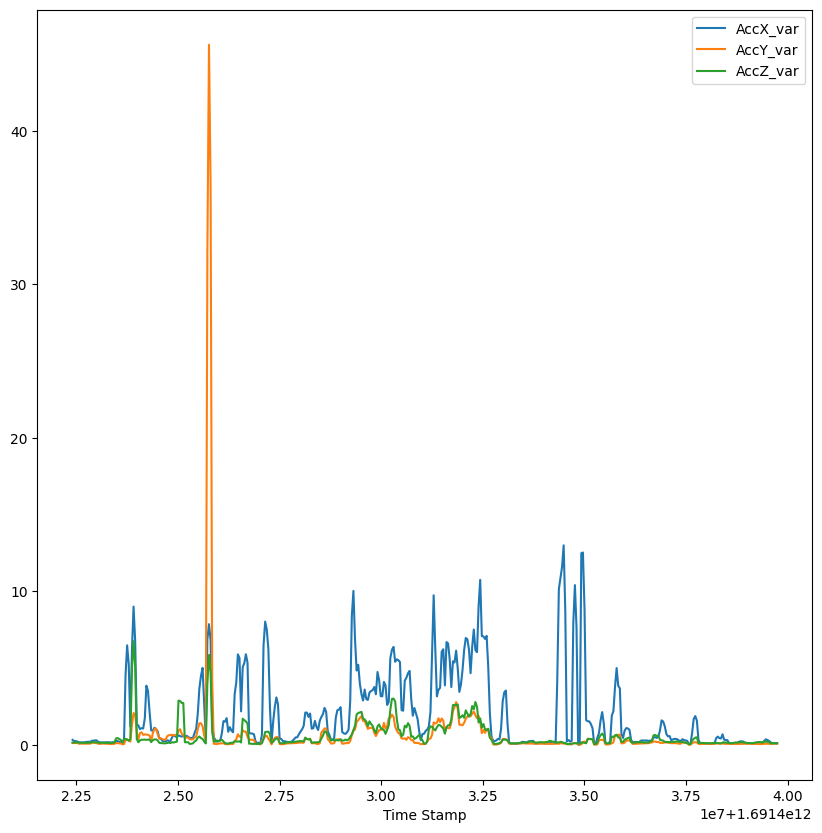

In [62]:
temp_group.plot(x="Time Stamp", y=['AccX_var', 'AccY_var', 'AccZ_var'], kind="line", figsize=(10,10))
plt.show()

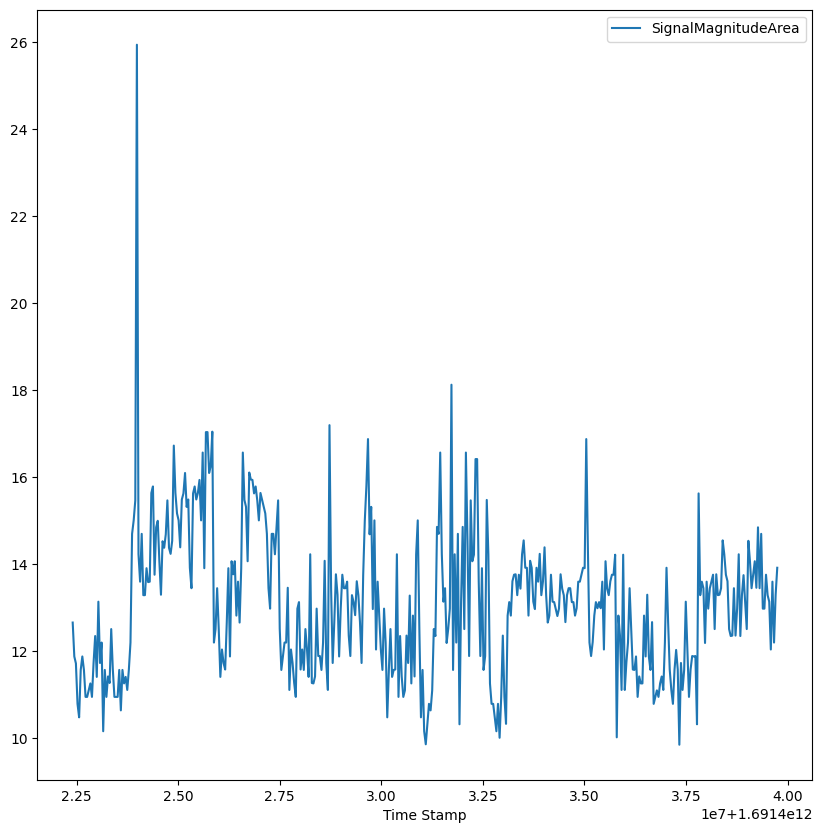

In [63]:
temp_group.plot(x="Time Stamp", y=['SignalMagnitudeArea'], kind="line", figsize=(10,10))
plt.show()

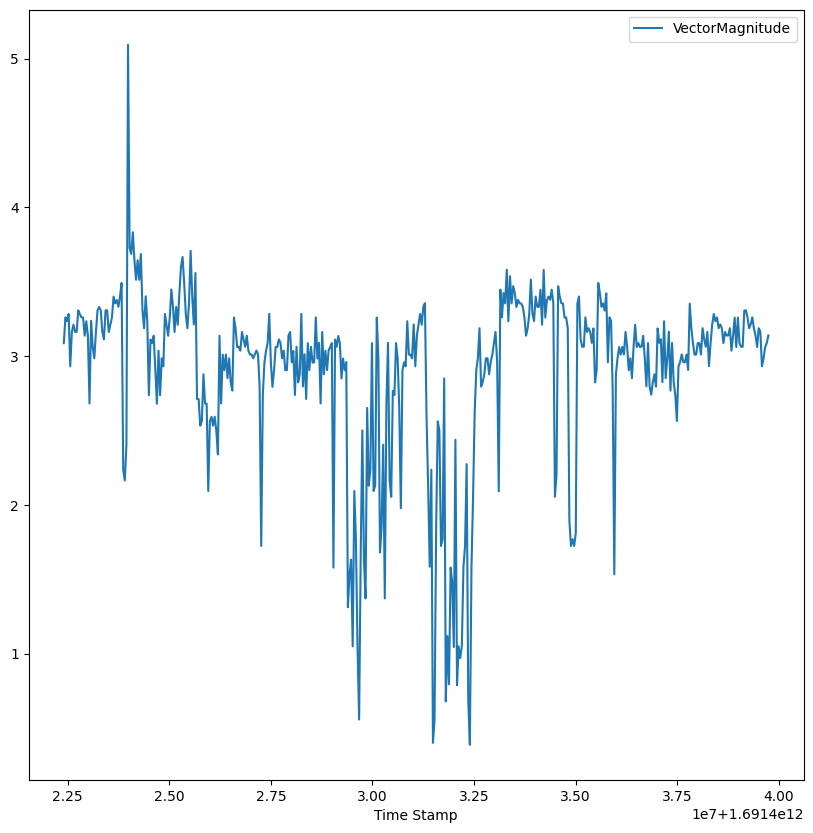

In [64]:
temp_group.plot(x="Time Stamp", y=['VectorMagnitude'], kind="line", figsize=(10,10))
plt.show()

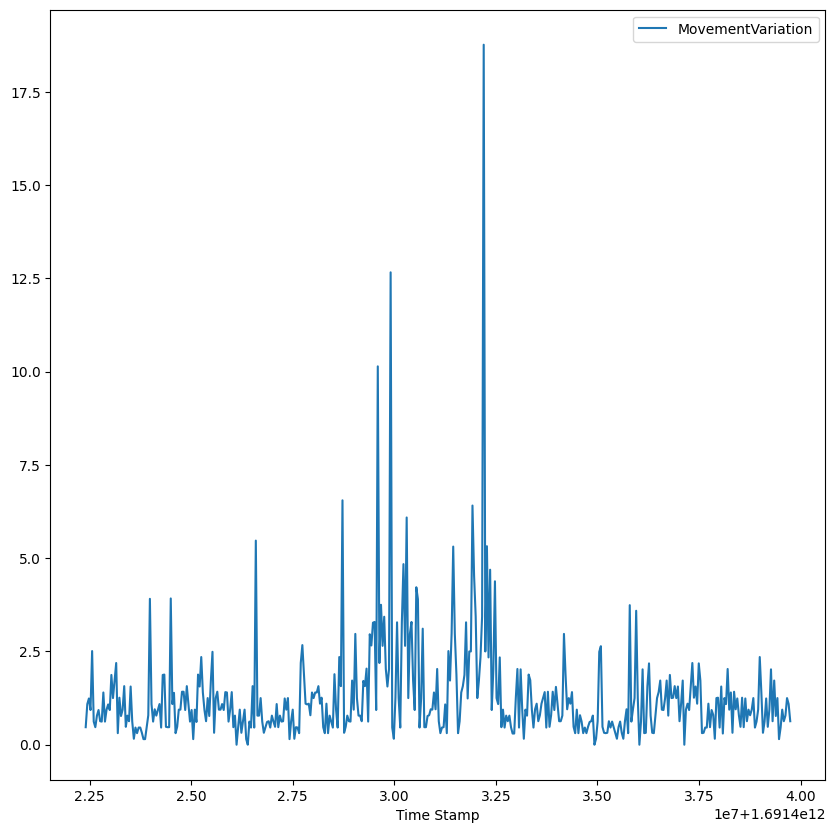

In [65]:
temp_group.plot(x="Time Stamp", y=['MovementVariation'], kind="line", figsize=(10,10))
plt.show()

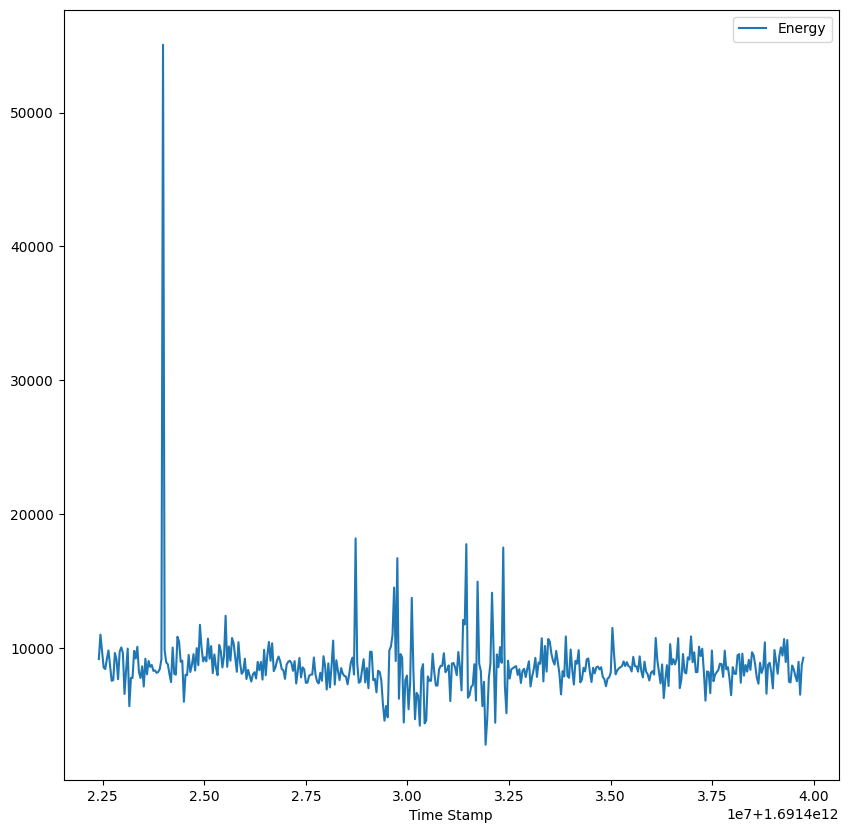

In [66]:
temp_group.plot(x="Time Stamp", y=['Energy'], kind="line", figsize=(10,10))
plt.show()

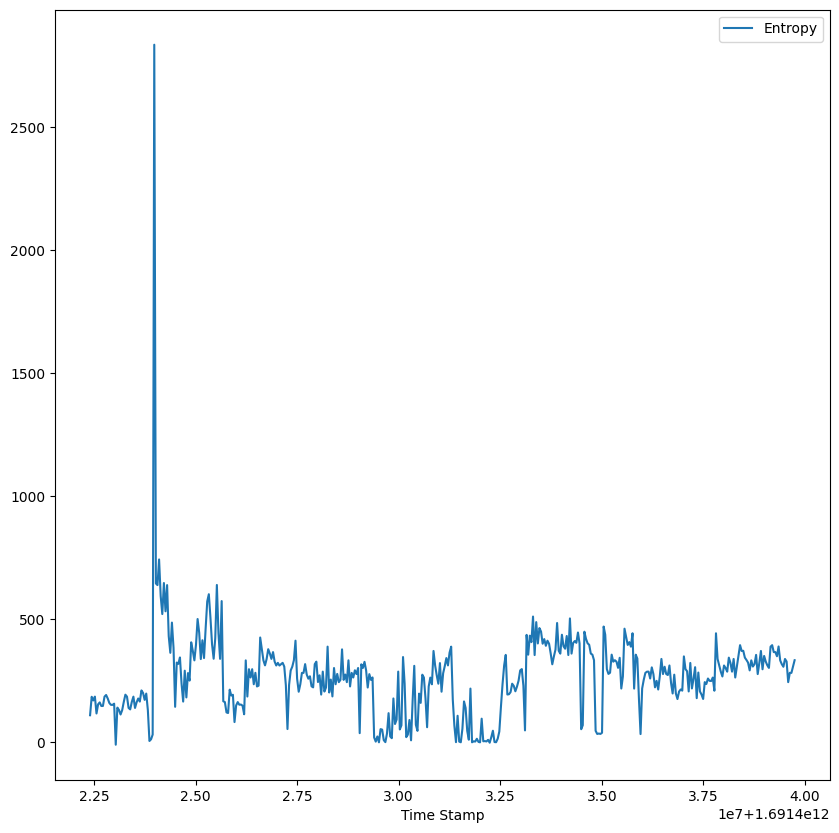

In [67]:
temp_group.plot(x="Time Stamp", y=['Entropy'], kind="line", figsize=(10,10))
plt.show()

### Moving average

In [68]:
data = pd.DataFrame()

In [69]:
data['moving_average_X'] = temp_group['AccX'].rolling(window=10).mean()
data['moving_average_Y'] = temp_group['AccY'].rolling(window=10).mean()
data['moving_average_Z'] = temp_group['AccZ'].rolling(window=10).mean()

In [70]:
data.fillna(0)

moving_average_X  moving_average_Y  moving_average_Z
0               0.000             0.000             0.000
1               0.000             0.000             0.000
2               0.000             0.000             0.000
3               0.000             0.000             0.000
4               0.000             0.000             0.000
..                ...               ...               ...
435             2.626             9.095            -1.734
436             2.563             9.079            -1.827
437             2.470             9.000            -1.734
438             2.423             9.000            -1.766
439             2.361             8.984            -1.766

[440 rows x 3 columns]

In [71]:
check_nan = data['moving_average_Z'].isnull().sum()
check_nan

9

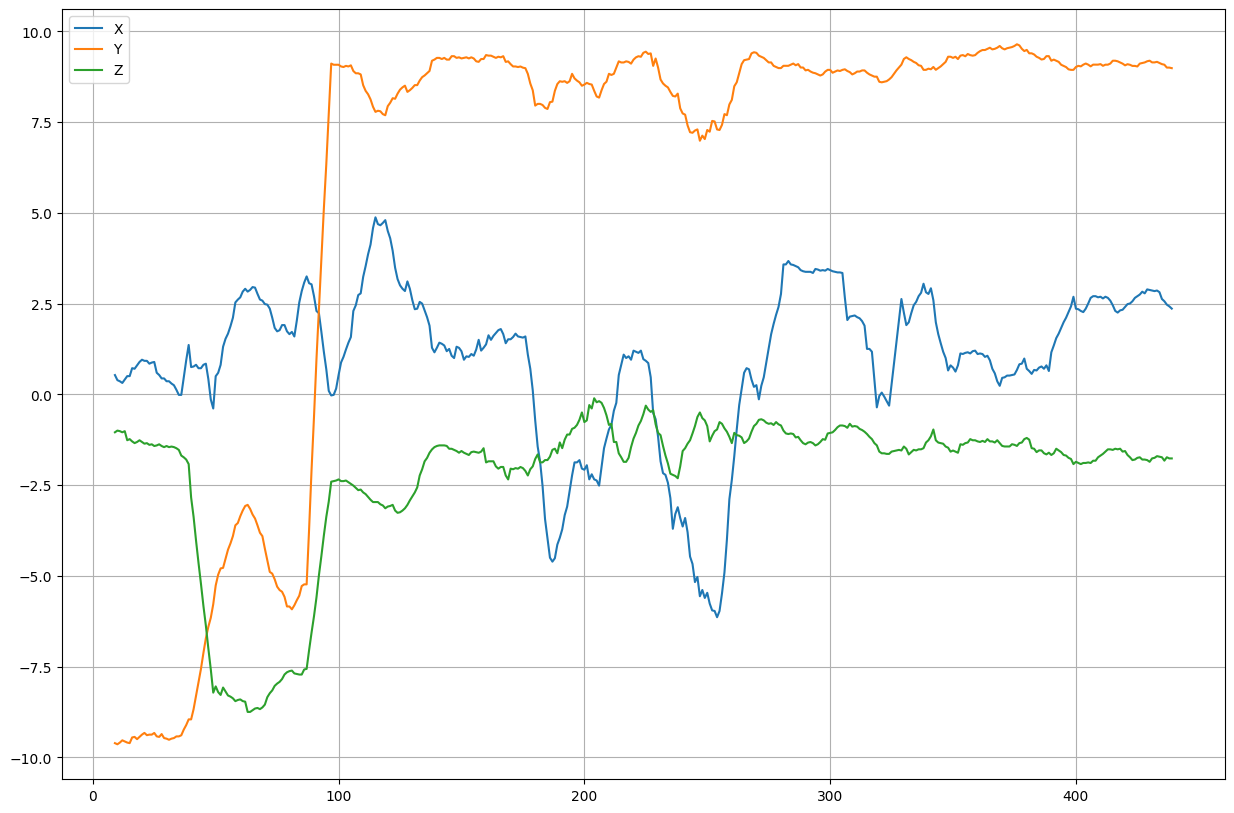

In [72]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(data['moving_average_X'],label='X')
plt.plot(data['moving_average_Y'],label='Y')
plt.plot(data['moving_average_Z'],label='Z')
plt.legend(loc=2)

## Japanese Cow Data

In [73]:
csv_path_japan = os.path.join('cow2.csv')
csv_path_japan

'cow2.csv'

In [74]:
data_japan = pd.read_csv(csv_path_japan)
data_japan

TimeStamp_UNIX    TimeStamp_JST   AccX   AccY   AccZ Label
0        1591930223678     11:50:23.678 -0.145 -0.943 -0.023   NaN
1        1591930223717     11:50:23.717 -0.174 -0.883 -0.003   NaN
2        1591930223757     11:50:23.757 -0.181 -0.870  0.005   NaN
3        1591930223797     11:50:23.797 -0.133 -0.865  0.011   NaN
4        1591930223837     11:50:23.837 -0.112 -0.853  0.002   NaN
...                ...              ...    ...    ...    ...   ...
269898   1591950069823  17:21:09.823000  0.439  0.939  0.059   NaN
269899   1591950069863  17:21:09.863000  0.488  0.959  0.042   NaN
269900   1591950069903  17:21:09.903000  0.466  0.966  0.067   NaN
269901   1591950069943  17:21:09.943000  0.446  0.967  0.055   NaN
269902   1591950069983  17:21:09.983000  0.455  0.969  0.039   NaN

[269903 rows x 6 columns]

In [75]:
data_japan = data_japan.drop(['Label', 'TimeStamp_JST'], axis=1)

In [76]:
data_japan

TimeStamp_UNIX   AccX   AccY   AccZ
0        1591930223678 -0.145 -0.943 -0.023
1        1591930223717 -0.174 -0.883 -0.003
2        1591930223757 -0.181 -0.870  0.005
3        1591930223797 -0.133 -0.865  0.011
4        1591930223837 -0.112 -0.853  0.002
...                ...    ...    ...    ...
269898   1591950069823  0.439  0.939  0.059
269899   1591950069863  0.488  0.959  0.042
269900   1591950069903  0.466  0.966  0.067
269901   1591950069943  0.446  0.967  0.055
269902   1591950069983  0.455  0.969  0.039

[269903 rows x 4 columns]

In [77]:
copied_data_japan = data_japan.copy()
copied_data_japan

TimeStamp_UNIX   AccX   AccY   AccZ
0        1591930223678 -0.145 -0.943 -0.023
1        1591930223717 -0.174 -0.883 -0.003
2        1591930223757 -0.181 -0.870  0.005
3        1591930223797 -0.133 -0.865  0.011
4        1591930223837 -0.112 -0.853  0.002
...                ...    ...    ...    ...
269898   1591950069823  0.439  0.939  0.059
269899   1591950069863  0.488  0.959  0.042
269900   1591950069903  0.466  0.966  0.067
269901   1591950069943  0.446  0.967  0.055
269902   1591950069983  0.455  0.969  0.039

[269903 rows x 4 columns]

In [78]:
copied_data_japan.dtypes

TimeStamp_UNIX      int64
AccX              float64
AccY              float64
AccZ              float64
dtype: object

In [79]:
copied_data_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269903 entries, 0 to 269902
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TimeStamp_UNIX  269903 non-null  int64  
 1   AccX            269903 non-null  float64
 2   AccY            269903 non-null  float64
 3   AccZ            269903 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 8.2 MB


In [80]:
copied_data_japan.head()

TimeStamp_UNIX   AccX   AccY   AccZ
0   1591930223678 -0.145 -0.943 -0.023
1   1591930223717 -0.174 -0.883 -0.003
2   1591930223757 -0.181 -0.870  0.005
3   1591930223797 -0.133 -0.865  0.011
4   1591930223837 -0.112 -0.853  0.002

In [81]:
copied_data_japan.describe()

TimeStamp_UNIX           AccX           AccY           AccZ
count    2.699030e+05  269903.000000  269903.000000  269903.000000
mean     1.591940e+12      -0.131902       0.913793       0.232667
std      7.385746e+06       0.230607       0.310869       0.291632
min      1.591930e+12      -2.823000      -2.340000      -2.336000
25%      1.591933e+12      -0.264000       0.748000       0.052000
50%      1.591936e+12      -0.081000       1.034000       0.118000
75%      1.591947e+12      -0.006000       1.054000       0.407000
max      1.591950e+12       2.577000       3.960000       3.704000

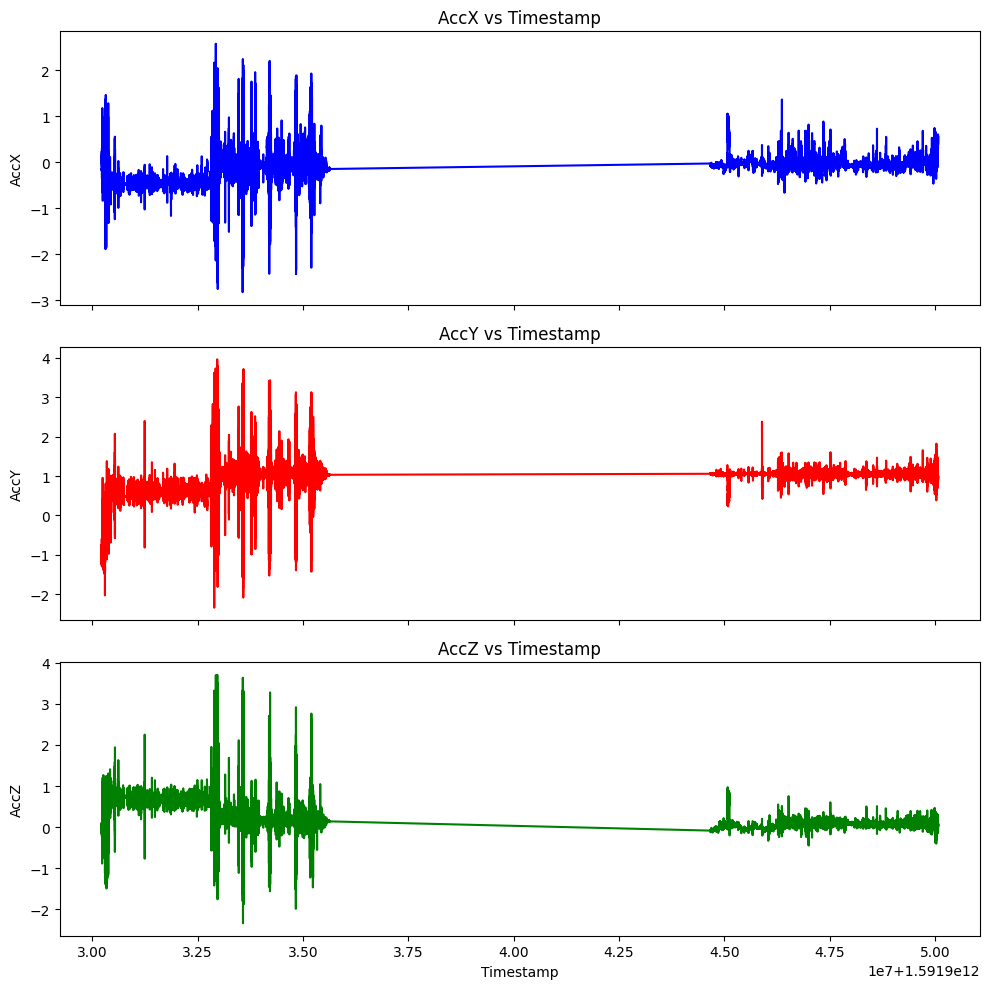

In [82]:
fig, axs = plt.subplots(3, 1, figsize=(10,10), sharex=True)

axs[0].plot(copied_data_japan['TimeStamp_UNIX'], copied_data_japan['AccX'], color='blue')
axs[0].set_title('AccX vs Timestamp')
axs[0].set_ylabel('AccX')

axs[1].plot(copied_data_japan['TimeStamp_UNIX'], copied_data_japan['AccY'], color='red')
axs[1].set_title('AccY vs Timestamp')
axs[1].set_ylabel('AccY')

axs[2].plot(copied_data_japan['TimeStamp_UNIX'], copied_data_japan['AccZ'], color='green')
axs[2].set_title('AccZ vs Timestamp')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('AccZ')

fig.tight_layout()

plt.show()

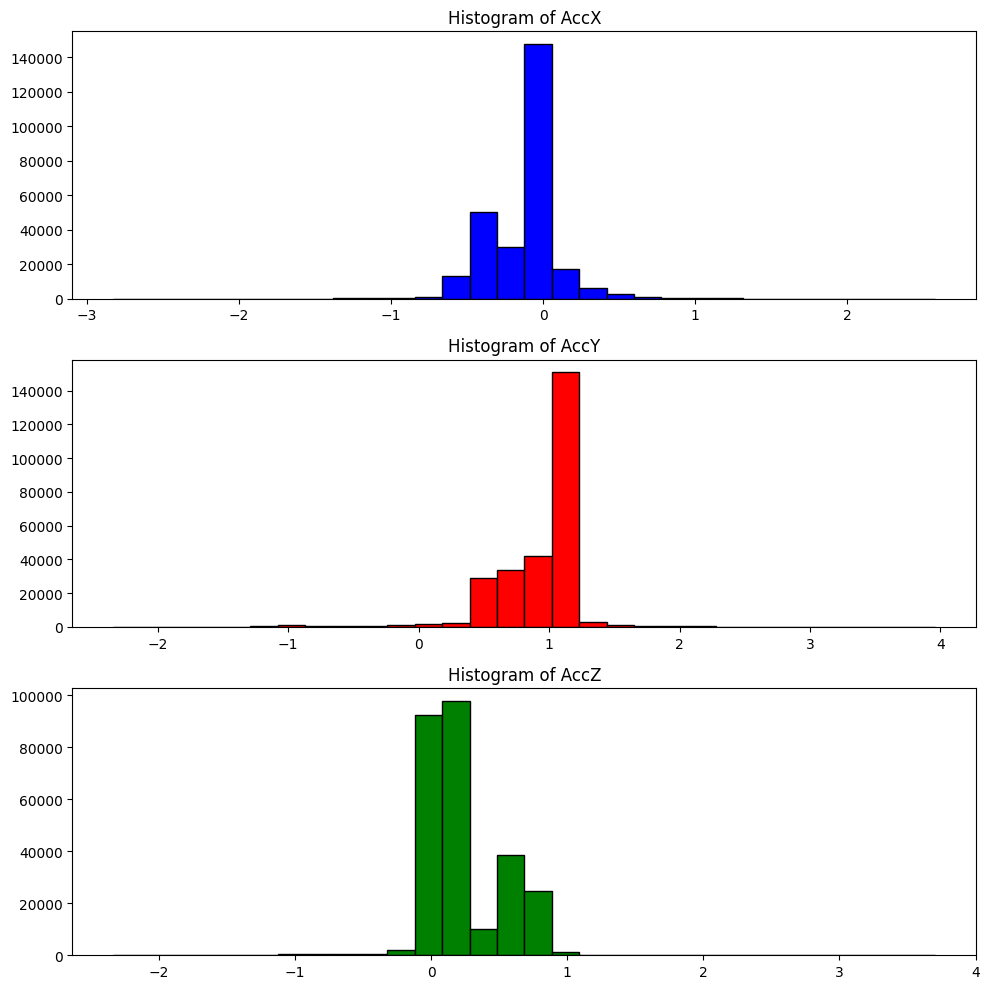

In [83]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))

axs[0].hist(copied_data_japan['AccX'], bins=30, color='blue', edgecolor='black')
axs[0].set_title('Histogram of AccX')

axs[1].hist(copied_data_japan['AccY'], bins=30, color='red', edgecolor='black')
axs[1].set_title('Histogram of AccY')

axs[2].hist(copied_data_japan['AccZ'], bins=30, color='green', edgecolor='black')
axs[2].set_title('Histogram of AccZ')

fig.tight_layout()

plt.show()


In [84]:
correlation = copied_data_japan[['AccX', 'AccY', 'AccZ']].corr()
correlation

AccX      AccY      AccZ
AccX  1.000000  0.425944 -0.655351
AccY  0.425944  1.000000 -0.411351
AccZ -0.655351 -0.411351  1.000000

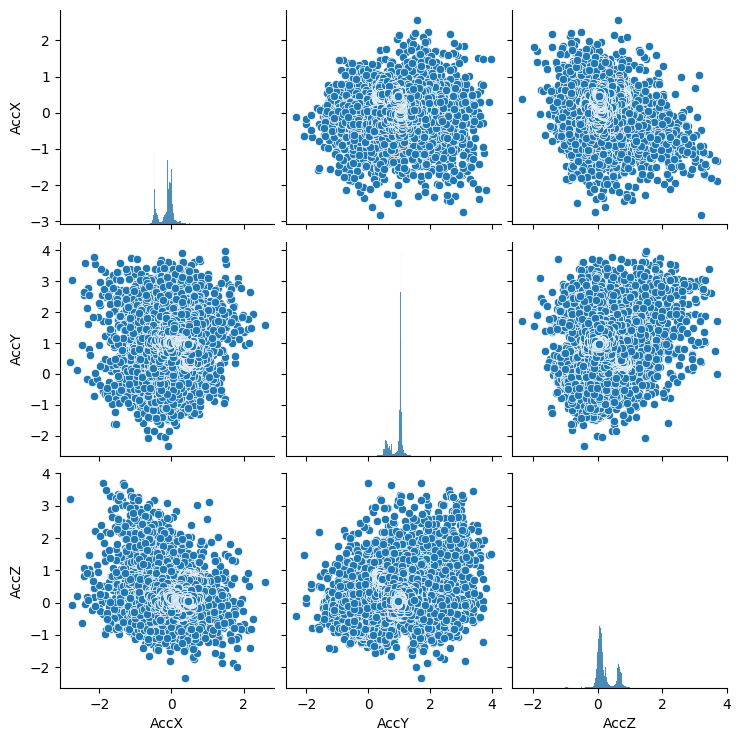

In [85]:
sns.pairplot(copied_data_japan[['AccX', 'AccY', 'AccZ']])
plt.show()

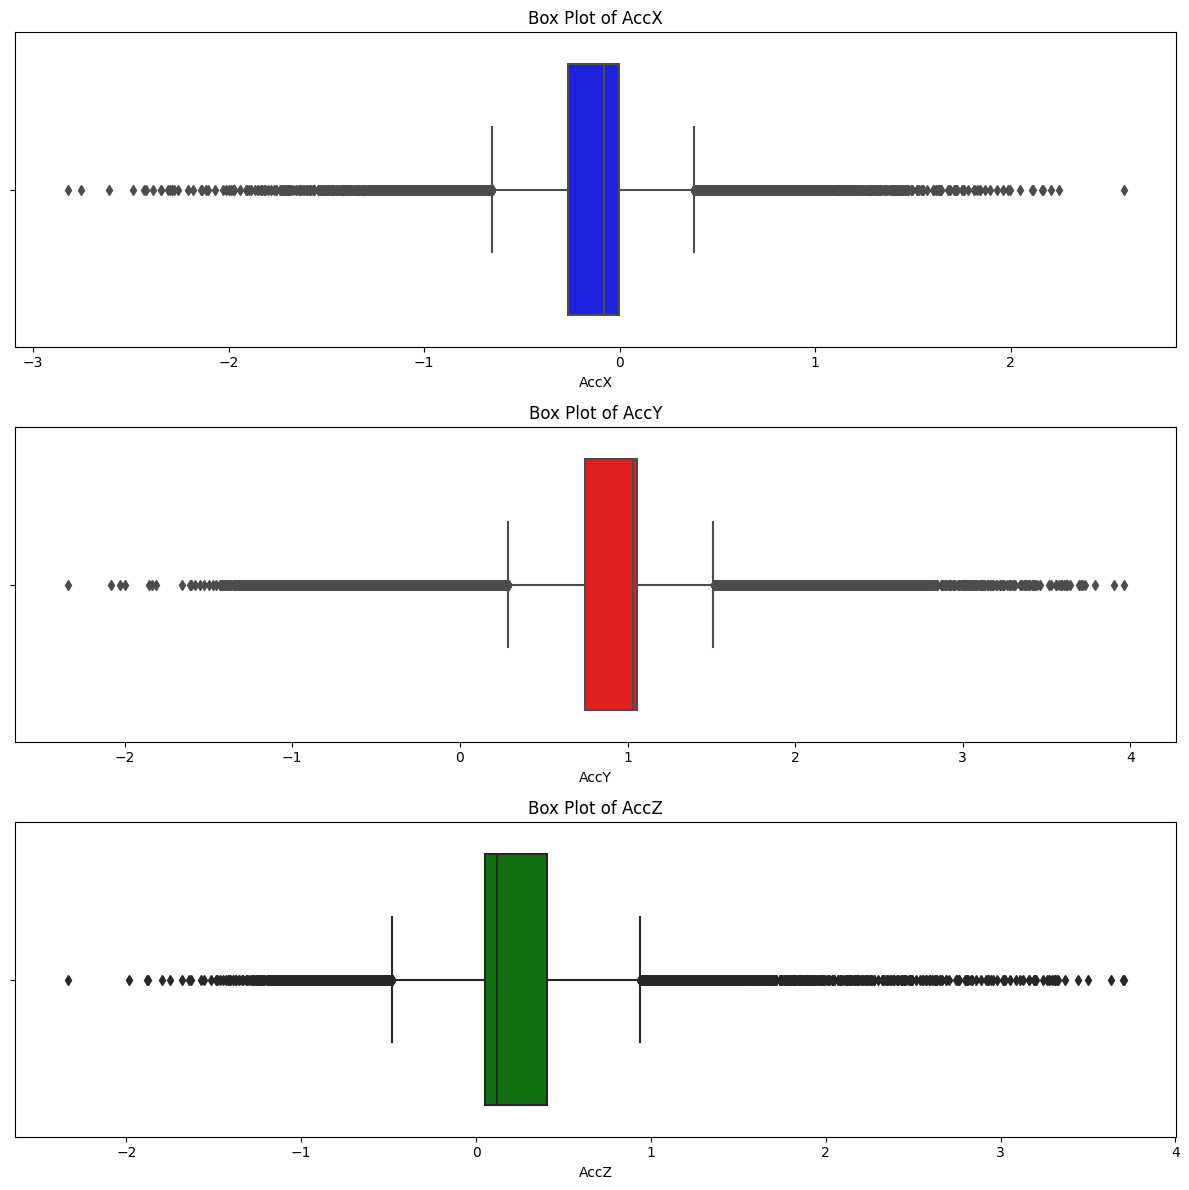

In [86]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

sns.boxplot(x=copied_data_japan['AccX'], ax=axs[0], color='blue')
axs[0].set_title('Box Plot of AccX')

sns.boxplot(x=copied_data_japan['AccY'], ax=axs[1], color='red')
axs[1].set_title('Box Plot of AccY')

sns.boxplot(x=copied_data_japan['AccZ'], ax=axs[2], color='green')
axs[2].set_title('Box Plot of AccZ')

fig.tight_layout()

plt.show()
